In [1]:
# load libraries
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from torch import save

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data_path = wk+subfolder+selected_dataset
data_path = "/content/drive/MyDrive/10. Meteotrentino/Dati csv convalidati/radiazione_solare_A.csv"

In [4]:
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [6]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

In [7]:
df['datetime'] = pd.to_datetime(df['date']+" "+df['time'], format = '%d/%m/%Y %H:%M')


In [8]:
# encode the date as integer
df['datetime_encoded'] = np.int64(df['datetime'].astype(int)/10**9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [9]:
df #Printing table

,label,date,time,value,validation_code,datetime,datetime_encoded
0,T0010,01/01/2014,00:00,0.0,1,2014-01-01 00:00:00,1388534400
1,T0010,01/01/2014,00:15,0.0,1,2014-01-01 00:15:00,1388535300
2,T0010,01/01/2014,00:30,0.0,1,2014-01-01 00:30:00,1388536200
3,T0010,01/01/2014,00:45,0.0,1,2014-01-01 00:45:00,1388537100
4,T0010,01/01/2014,01:00,0.0,1,2014-01-01 01:00:00,1388538000
...,...,...,...,...,...,...,...
8660686,T0469,31/12/2021,22:45,0.0,1,2021-12-31 22:45:00,1640990700
8660687,T0469,31/12/2021,23:00,0.0,1,2021-12-31 23:00:00,1640991600
8660688,T0469,31/12/2021,23:15,0.0,1,2021-12-31 23:15:00,1640992500
8660689,T0469,31/12/2021,23:30,0.0,1,2021-12-31 23:30:00,1640993400


In [10]:
# split the dataframe by date

date_start = df['datetime'].min()

date_end = df['datetime'].max()


# period
period_split = 24 #hours

current_data = date_start

df['period_index'] = [-1]*len(df['datetime'])

i = 0
while current_data < date_end:

  offset_data = current_data+ pd.offsets.Hour(period_split)
  
  df['period_index'][(df['datetime'] < offset_data) & (df['datetime'] >= current_data)] = i

  current_data = offset_data
  i = i+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [109]:
df["validation_code"] = np.where(df["validation_code"] == 1, 0, 1)
df["validation_code"]

0          0
1          0
2          0
3          0
4          0
          ..
8660686    0
8660687    0
8660688    0
8660689    0
8660690    0
Name: validation_code, Length: 8660691, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


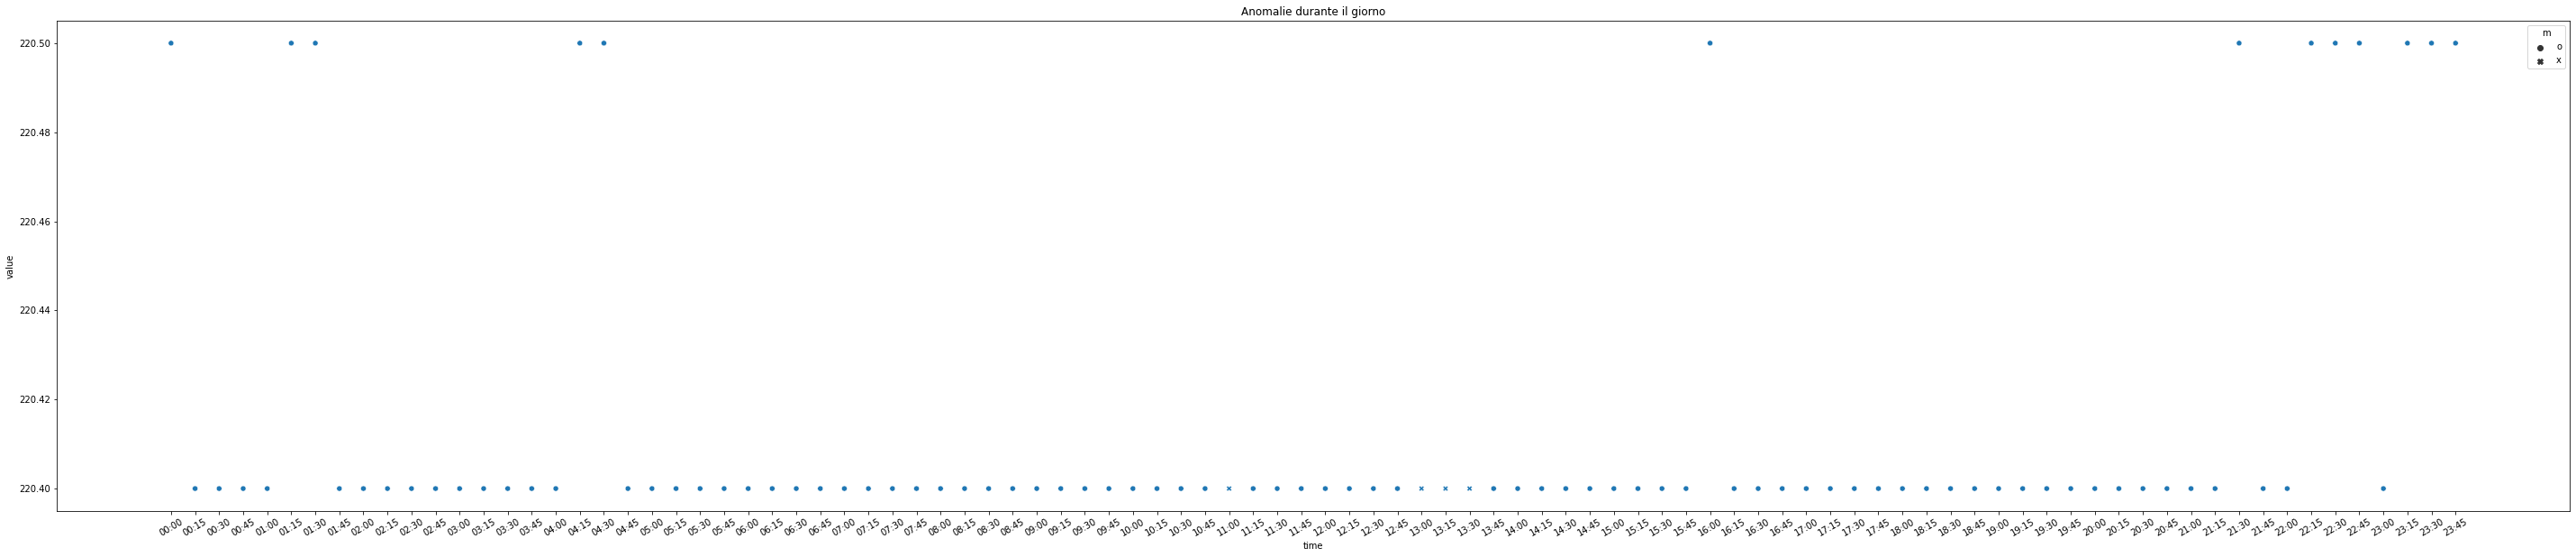

In [142]:
date_to_plot = "12/09/2016" #@param {type:"string"}
station_num = "T0360" #@param {type:"string"}

df_station_datetime = df[df.date == date_to_plot]
arr = df_station_datetime[df.label == station_num]

x_plot = arr.time
y_plot = arr.value

f = plt.figure()
f.set_figwidth(50)
f.set_figheight(10)

# Create subplot

ax = plt.subplot()

# Define tick label
ax.set_xticklabels(x_plot,rotation=30)

plt.title('Anomalie durante il giorno')
plt.ylabel('value')
plt.xlabel('time')

marker_arr = np.where(arr["validation_code"] == 0, 'o', 'x')

marker_arr[44] = "x"
marker_arr[52] = "x"
marker_arr[54] = "x"
marker_arr[53] = "x"

import seaborn as sns # '0.9.0'

data = pd.DataFrame(
    dict(x=x_plot,
    y=y_plot,
    m= marker_arr,)
)

sns.scatterplot(data=data, x='x', y='y', style='m')

plt.autoscale()
# Visualize
# plt.show()

In [138]:
arr

,label,date,time,value,validation_code,datetime,datetime_encoded,period_index,bool
